True values: beta0 = 5, beta1 = 2
Estimated (standard equations): beta0 = 5.22, beta1 = 1.95
Estimated (scikit-learn): beta0 = 5.22, beta1 = 1.95


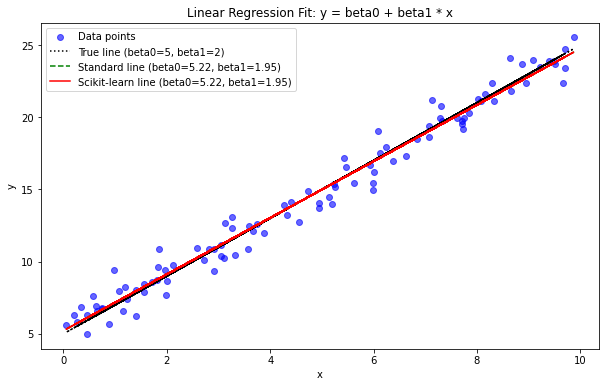

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(42)  # For reproducibility
beta0_true = 5  # True constant term
beta1_true = 2  # True linear term
num_points = 100
x = np.random.uniform(0, 10, num_points)
noise = np.random.normal(0, 1, num_points)
y = beta0_true + beta1_true * x + noise

# Estimate coefficients using standard equations
x_mean = np.mean(x)
y_mean = np.mean(y)
beta1_standard = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta0_standard = y_mean - beta1_standard * x_mean

# Estimate coefficients using scikit-learn
x_reshaped = x.reshape(-1, 1)  # Reshape x to 2D array for sklearn
model = LinearRegression()
model.fit(x_reshaped, y)  # Fit the model
theta0_sklearn = model.intercept_
theta1_sklearn = model.coef_[0]

# Print results
print(f"True values: beta0 = {beta0_true}, beta1 = {beta1_true}")
print(f"Estimated (standard equations): beta0 = {beta0_standard:.2f}, beta1 = {beta1_standard:.2f}")
print(f"Estimated (scikit-learn): beta0 = {theta0_sklearn:.2f}, beta1 = {theta1_sklearn:.2f}")

# Plot the data and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points', alpha=0.6)

# True line
y_true = beta0_true + beta1_true * x
plt.plot(x, y_true, color='black', linestyle=':', label=f'True line (beta0={beta0_true}, beta1={beta1_true})')

# Standard equation line
y_standard = beta0_standard + beta1_standard * x
plt.plot(x, y_standard, color='green', linestyle='--', label=f'Standard line (beta0={beta0_standard:.2f}, beta1={beta1_standard:.2f})')

# Scikit-learn line
y_sklearn = theta0_sklearn + theta1_sklearn * x
plt.plot(x, y_sklearn, color='red', linestyle='-', label=f'Scikit-learn line (beta0={theta0_sklearn:.2f}, beta1={theta1_sklearn:.2f})')

plt.title('Linear Regression Fit: y = beta0 + beta1 * x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()